<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

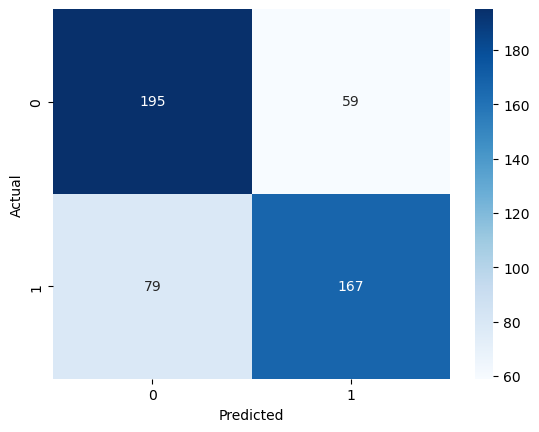

Decision Tree:
Accuracy: 0.788
Precision: 0.7611940298507462
Recall: 0.8292682926829268
F1 Score: 0.7937743190661478

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78       254
           1       0.76      0.83      0.79       246

    accuracy                           0.79       500
   macro avg       0.79      0.79      0.79       500
weighted avg       0.79      0.79      0.79       500



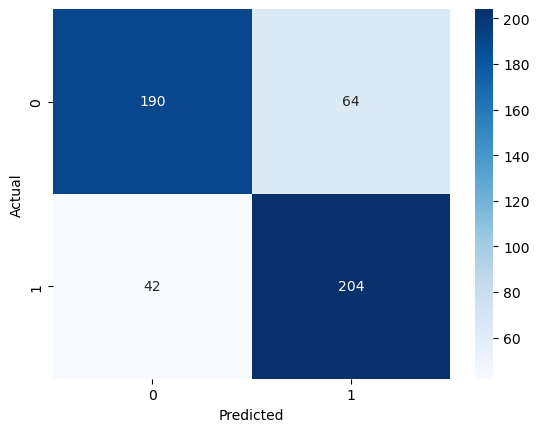

Support Vector Machine:
Accuracy: 0.754
Precision: 0.7469879518072289
Recall: 0.7560975609756098
F1 Score: 0.7515151515151515

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.76       254
           1       0.75      0.76      0.75       246

    accuracy                           0.75       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.75      0.75      0.75       500



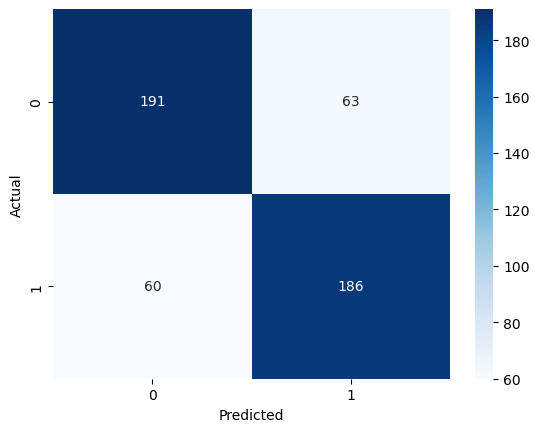

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3}
Accuracy: 0.794
Precision: 0.769811320754717
Recall: 0.8292682926829268
F1 Score: 0.7984344422700587

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       254
           1       0.77      0.83      0.80       246

    accuracy                           0.79       500
   macro avg       0.80      0.79      0.79       500
weighted avg       0.80      0.79      0.79       500



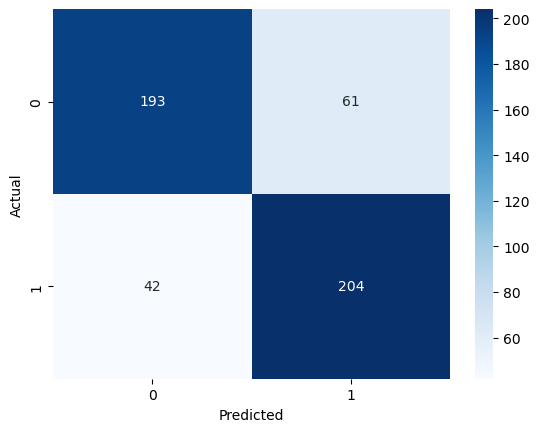

['disease_prediction_model.pkl']

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import joblib

# Load the dataset
data = pd.read_csv(r'D:\Machine_Learning\diabities\diabetes.csv')

# Explore the dataset
print(data.info())
print(data.describe())
print(data.isnull().sum())  # Check for missing values

# Check the target column name
target_column = 'Outcome'  # Assuming the target column is named 'Outcome' in your dataset
if target_column not in data.columns:
    raise KeyError(f"The dataset does not contain a '{target_column}' column.")

# Handle missing values
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Get columns by their data types
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

# Check categorical columns
print(f"Categorical columns detected: {cat_cols}")

# If no categorical columns, skip the imputation for categorical variables
if len(cat_cols) > 0:
    data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

# Handle imbalanced data
print(data[target_column].value_counts())
majority = data[data[target_column] == 0]
minority = data[data[target_column] == 1]
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
data_balanced = pd.concat([majority, minority_upsampled])

# Feature encoding and scaling
data_encoded = pd.get_dummies(data_balanced, drop_first=True)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data_encoded.drop(target_column, axis=1)), columns=data_encoded.drop(target_column, axis=1).columns)
y = data_balanced[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=45)

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Train Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Train Support Vector Machine
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# Evaluate models
def evaluate_model(y_test, y_pred):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

print("Logistic Regression:")
evaluate_model(y_test, y_pred_log)

print("Decision Tree:")
evaluate_model(y_test, y_pred_dt)

print("Support Vector Machine:")
evaluate_model(y_test, y_pred_svc)

# Hyperparameter tuning for Decision Tree
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [3, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
evaluate_model(y_test, y_pred_best)

# Save the model
joblib.dump(log_reg, 'disease_prediction_model.pkl')
